In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import *
from qiskit.algorithms.optimizers import GradientDescent, ADAM, L_BFGS_B
from qiskit.quantum_info.operators import Operator
from qiskit.primitives import Estimator
from qiskit.circuit import Parameter
from qiskit.quantum_info import DensityMatrix
from scipy.optimize import *
import matplotlib.pyplot as plt
from qiskit.algorithms import SciPyImaginaryEvolver

/var/folders/dk/2y17dwn916n0849gyw2c2q3c0000gn/T/ipykernel_5397/3955755750.py:5: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import GradientDescent, ADAM, L_BFGS_B


In [2]:
def Ham(N, a, b):
    
    def krId(N):
        matrix = np.array(1)
        for j in range(N):
            matrix = np.kron(matrix, IGate())
        return matrix  
    
    def ktot(N):
        def k_m(N,a,m):
            k = (krId(N)-krZ(m,N))/2.0
            return k
        sum = 0
        for h in range(N):
            sum += 2**h * k_m(N,1,h)
        return sum
    mat = a**2 * np.linalg.matrix_power(((0.5 * np.kron(ZGate(), krId(N-1)) + np.kron(ZGate(),ktot(N-1)))),b) 
    return mat
        

In [4]:
def krZ(m, N):
        matrix = np.array(1)
        for j in range(N):
            if m == j:
                matrix = np.kron(matrix, ZGate())     
            else:
                matrix = np.kron(matrix, IGate())
        return matrix  


In [8]:
krZ(0,2)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [8]:
def Ansatz(depth, N, param_num_perlayer):
    #if param_num_perlayer > N**2:
     #   raise Exception('number of parameters are bigger then the rotation gates possible')
        
    circuit = QuantumCircuit(N)
    thetas = []
    for l in range(param_num_perlayer*depth):
        thetas.append(Parameter('θ_'+str(l)))
    counter_2 = 0
    for i in range(depth):
        circuit.barrier()
        counter = 0
        for j in range(N):
            if j+counter + counter_2 <len(thetas) and j+counter+counter_2 < param_num_perlayer *(i+1):
                circuit.rx(thetas[j+counter + counter_2],j)
            if j+1+counter + counter_2 <len(thetas) and j+1+counter+counter_2 < param_num_perlayer *(i+1):
                circuit.ry(thetas[j+1+counter + counter_2],j)
            if j+2+counter + counter_2< len(thetas) and j+2+counter+counter_2 < param_num_perlayer *(i+1):
                circuit.rz(thetas[j+2+counter + counter_2],j)
            else: 
                break
            counter += 2
        counter_2 += param_num_perlayer  
        for p in range(N):
            if p+1 < len(range(N)):
                circuit.cx(p,(p+1))
            else:
                break
    return circuit

In [9]:
def costfn(param, ansatz):
    state = ansatz
    binded = state.bind_parameters({state.parameters[i]:param[i] for i in range(len(param))})
    op = Operator(Ham(2,1,2)-Ham(2,1,4))
    estimator = Estimator()
    expectation_value = estimator.run(binded, op).result().values[0]  
    return expectation_value

In [10]:
def optimization(theta_start,cost_fun,ansatz):
    optvalues=[]
    def callback(intermediate_result):
        optvalues.append(intermediate_result.fun)
    
    optimized = minimize(fun=cost_fun, x0=theta_start,args=(ansatz), method="L-BFGS-B", callback=callback )
    state = ansatz
    statevector = state.bind_parameters({state.parameters[i]:optimized.x[i] for i in range(len(optimized.x))})
    return optimized, optimized.x, statevector, optvalues

In [11]:
optimized2=optimization(np.random.uniform(low=0, high=np.pi, size=(24)), costfn, Ansatz(4,2,6))
optimized3=optimization(np.random.uniform(low=0, high=np.pi, size=(12)), costfn, Ansatz(2,2,6))

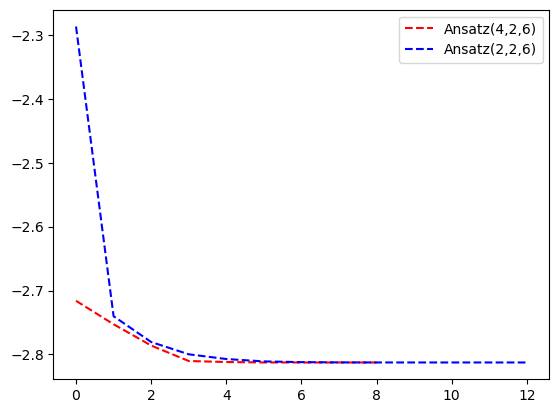

In [12]:
fig = plt.figure()
plt.plot(optimized2[3],'r--',label="Ansatz(4,2,6)")
plt.plot(optimized3[3],'b--', label="Ansatz(2,2,6)")
plt.legend()




In [13]:
Ansatz(2,2,6).draw("mpl")

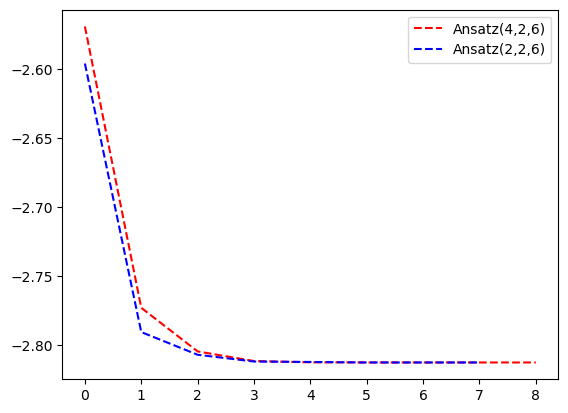

In [14]:
print(optimized2[0])

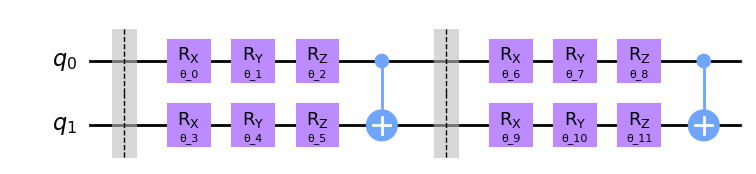

In [10]:
print(expectation_value)

NameError: name 'expectation_value' is not defined

In [138]:
np.random.uniform(low=0, high=np.pi, size=(4))

array([0.24559951, 0.25683956, 1.507403  , 0.15822727])